# For Final Result Look at Last

In [87]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/MLChallenge-2/Test.csv
/kaggle/input/MLChallenge-2/final.csv


In [88]:
!pip install pycaret

In [89]:
!pip install shap

In [407]:
from pycaret.datasets import get_data
from pycaret.classification import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler as ss
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

from catboost import CatBoostClassifier
from yellowbrick.regressor import residuals_plot
from yellowbrick.datasets import load_concrete


from xgboost import XGBRegressor


In [349]:
data = pd.read_csv("/kaggle/input/MLChallenge-2/final.csv")
data_sub = pd.read_csv("/kaggle/input/MLChallenge-2/Test.csv")
df = data

In [350]:
data.head()

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,29,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
1,57,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
2,9,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
3,147,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
4,303,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [351]:
classes=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

In [352]:
data_sub.head()

,ID,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,128,67,0,2,152,277,0,1,172,0,0.0,2,1,2
1,232,57,1,0,165,289,1,0,124,0,1.0,1,3,3
2,220,48,1,0,130,256,1,0,150,1,0.0,2,2,3
3,184,58,1,2,112,230,0,0,165,0,2.5,1,1,3
4,25,40,1,3,140,199,0,1,178,1,1.4,2,0,3


In [353]:
print(data.shape)

(253, 15)


In [354]:
print(data_sub.shape)

(50, 14)


In [355]:
data.isnull().sum()

ID          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [356]:
data=data.drop(['ID'], axis = 1) 

In [357]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
1,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
2,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
3,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
4,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [358]:
data_sub = data_sub.drop(['ID'], axis = 1) 

In [359]:
data_sub.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,67,0,2,152,277,0,1,172,0,0.0,2,1,2
1,57,1,0,165,289,1,0,124,0,1.0,1,3,3
2,48,1,0,130,256,1,0,150,1,0.0,2,2,3
3,58,1,2,112,230,0,0,165,0,2.5,1,1,3
4,40,1,3,140,199,0,1,178,1,1.4,2,0,3


In [360]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,53.976285,0.683794,0.980237,131.822134,245.051383,0.138340,0.509881,150.260870,0.332016,1.037945,1.399209,0.691700,2.312253,0.541502
std,9.156890,0.465916,1.032990,17.288518,52.583053,0.345941,0.524122,22.538924,0.471870,1.163799,0.612955,1.011742,0.618280,0.499262
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,210.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,239.000000,0.000000,0.000000,154.000000,0.000000,0.700000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,271.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


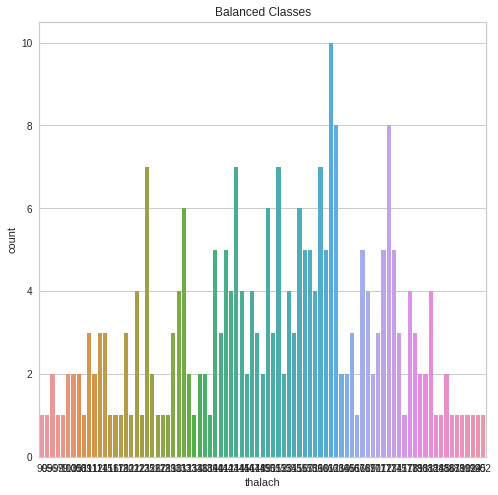

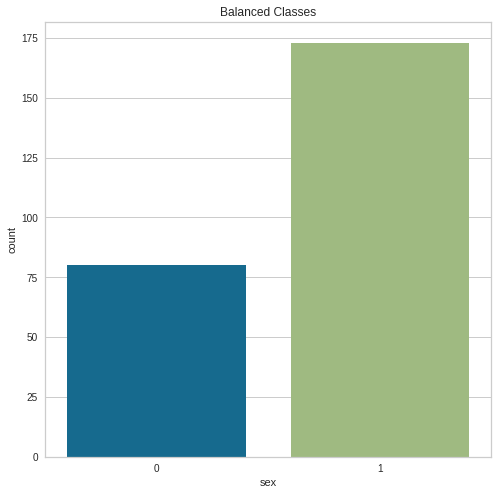

In [361]:
plt.figure(figsize=(8, 8))
sns.countplot('thalach', data=df)
plt.title('Balanced Classes')
plt.show()

plt.figure(figsize=(8, 8))
sns.countplot('sex', data=df)
plt.title('Balanced Classes')
plt.show()
# Imbalanced Data on gender will be resampled

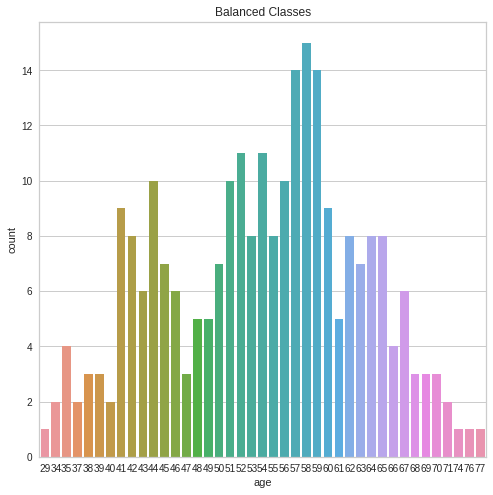

In [362]:
plt.figure(figsize=(8, 8))
sns.countplot('age', data=df)
plt.title('Balanced Classes')
plt.show()

In [363]:
df.apply(lambda x: len(x.unique()))  

ID          253
age          41
sex           2
cp            4
trestbps     46
chol        142
fbs           2
restecg       3
thalach      85
exang         2
oldpeak      39
slope         3
ca            5
thal          4
target        2
dtype: int64

In [364]:
print(data.shape)

(253, 14)


In [365]:
print(data_sub.shape)

(50, 13)


In [366]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       253 non-null    int64  
 1   sex       253 non-null    int64  
 2   cp        253 non-null    int64  
 3   trestbps  253 non-null    int64  
 4   chol      253 non-null    int64  
 5   fbs       253 non-null    int64  
 6   restecg   253 non-null    int64  
 7   thalach   253 non-null    int64  
 8   exang     253 non-null    int64  
 9   oldpeak   253 non-null    float64
 10  slope     253 non-null    int64  
 11  ca        253 non-null    int64  
 12  thal      253 non-null    int64  
 13  target    253 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 27.8 KB


In [367]:
print(data.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


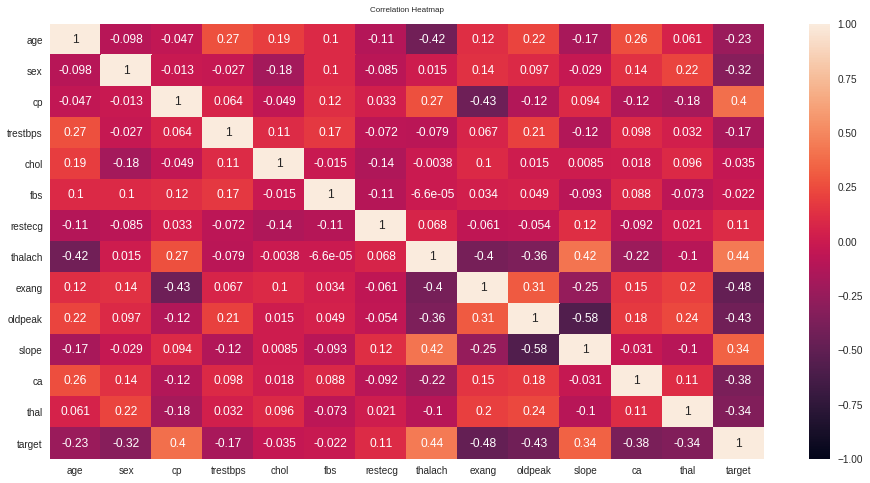

In [368]:
plt.figure(figsize=(16, 8))
#sns.heatmap(data.corr())
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=12);

In [369]:
df = df.drop(['ID'], axis = 1) 

In [370]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
1,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
2,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
3,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
4,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# Data Preprocessing

In [371]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [372]:
print(X)

[[65.  0.  2. ...  2.  1.  2.]
 [48.  1.  0. ...  2.  0.  2.]
 [52.  1.  2. ...  2.  0.  3.]
 ...
 [62.  1.  1. ...  2.  0.  2.]
 [60.  1.  0. ...  1.  1.  3.]
 [52.  1.  1. ...  2.  0.  2.]]


In [373]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [374]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(202, 13)
(51, 13)
(202,)
(51,)


In [394]:
# Transormation
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [375]:
classifier_lr = LogisticRegression()
classifier_lr.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_lr.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier_lr.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print("Comfusion Metrics Train :- \n",cm_train)
print("Comfusion Metrics Test :- \n",cm_test)
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Comfusion Metrics Train :- 
 [[80 10]
 [18 94]]
Comfusion Metrics Test :- 
 [[16  4]
 [ 2 29]]
Accuracy for training set for Logistic Regression = 0.8613861386138614
Accuracy for test set for Logistic Regression = 0.8823529411764706


In [376]:
print("F1 Score train :- ",metrics.f1_score(y_pred_train, y_train))
print("ROC_AUC Score train :- ",metrics.roc_auc_score(y_pred_train, y_train))
print("Kappa Score train :- ",metrics.cohen_kappa_score(y_pred_train, y_train))
print()
print("F1 Score test :- ",metrics.f1_score(y_pred, y_test))
print("ROC_AUC Score test :- ",metrics.roc_auc_score(y_pred, y_test))
print("Kappa Score test :- ",metrics.cohen_kappa_score(y_pred, y_test))

F1 Score train :-  0.8703703703703703
ROC_AUC Score train :-  0.8640873015873016
Kappa Score train :-  0.7218725413060583

F1 Score test :-  0.90625
ROC_AUC Score test :-  0.867741935483871
Kappa Score test :-  0.7487684729064039


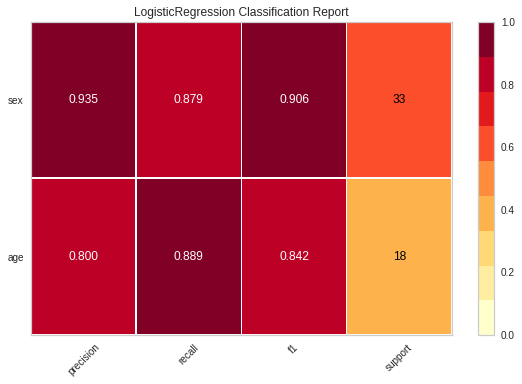

In [377]:
visualizer = ClassificationReport(classifier_lr, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()       

# Decision Tree

In [378]:
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_dt.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier_dt.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print("Comfusion Metrics Train :- \n",cm_train)
print("Comfusion Metrics Test :- \n",cm_test)
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Comfusion Metrics Train :- 
 [[ 98   0]
 [  0 104]]
Comfusion Metrics Test :- 
 [[14  6]
 [ 4 27]]
Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.803921568627451


In [379]:
print("F1 Score train :- ",metrics.f1_score(y_pred_train, y_train))
print("ROC_AUC Score train :- ",metrics.roc_auc_score(y_pred_train, y_train))
print("Kappa Score train :- ",metrics.cohen_kappa_score(y_pred_train, y_train))
print()
print("F1 Score test :- ",metrics.f1_score(y_pred, y_test))
print("ROC_AUC Score test :- ",metrics.roc_auc_score(y_pred, y_test))
print("Kappa Score test :- ",metrics.cohen_kappa_score(y_pred, y_test))

F1 Score train :-  1.0
ROC_AUC Score train :-  1.0
Kappa Score train :-  1.0

F1 Score test :-  0.84375
ROC_AUC Score test :-  0.7854838709677419
Kappa Score test :-  0.5812807881773399


# Random Forest

In [380]:
classifier_rf = RandomForestClassifier(n_estimators = 10)
classifier_rf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_rf.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier_rf.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print("Comfusion Metrics Train :- \n",cm_train)
print("Comfusion Metrics Test :- \n",cm_test)
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

Comfusion Metrics Train :- 
 [[ 98   0]
 [  0 104]]
Comfusion Metrics Test :- 
 [[15  9]
 [ 3 24]]
Accuracy for training set for Random Forest = 1.0
Accuracy for test set for Random Forest = 0.7647058823529411


In [381]:
print("F1 Score train :- ",metrics.f1_score(y_pred_train, y_train))
print("ROC_AUC Score train :- ",metrics.roc_auc_score(y_pred_train, y_train))
print("Kappa Score train :- ",metrics.cohen_kappa_score(y_pred_train, y_train))
print()
print("F1 Score test :- ",metrics.f1_score(y_pred, y_test))
print("ROC_AUC Score test :- ",metrics.roc_auc_score(y_pred, y_test))
print("Kappa Score test :- ",metrics.cohen_kappa_score(y_pred, y_test))

F1 Score train :-  1.0
ROC_AUC Score train :-  1.0
Kappa Score train :-  1.0

F1 Score test :-  0.7999999999999999
ROC_AUC Score test :-  0.7569444444444444
Kappa Score test :-  0.5211267605633803


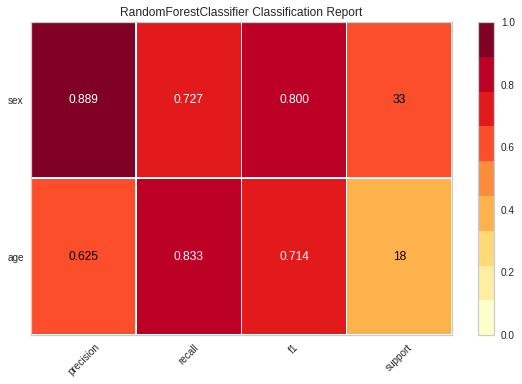

In [382]:
visualizer = ClassificationReport(classifier_rf, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()       

# SVM

In [383]:
classifier_svc = SVC(kernel = 'rbf')
classifier_svc.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier_svc.predict(X_test)


cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier_svc.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print("Comfusion Metrics Train :- \n",cm_train)
print("Comfusion Metrics Test :- \n",cm_test)
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Comfusion Metrics Train :- 
 [[56 17]
 [42 87]]
Comfusion Metrics Test :- 
 [[ 8  6]
 [10 27]]
Accuracy for training set for svm = 0.7079207920792079
Accuracy for test set for svm = 0.6862745098039216


In [384]:
print("F1 Score train :- ",metrics.f1_score(y_pred_train, y_train))
print("ROC_AUC Score train :- ",metrics.roc_auc_score(y_pred_train, y_train))
print("Kappa Score train :- ",metrics.cohen_kappa_score(y_pred_train, y_train))
print()
print("F1 Score test :- ",metrics.f1_score(y_pred, y_test))
print("ROC_AUC Score test :- ",metrics.roc_auc_score(y_pred, y_test))
print("Kappa Score test :- ",metrics.cohen_kappa_score(y_pred, y_test))

F1 Score train :-  0.7467811158798284
ROC_AUC Score train :-  0.7207709461611977
Kappa Score train :-  0.4109914006128299

F1 Score test :-  0.7714285714285715
ROC_AUC Score test :-  0.6505791505791506
Kappa Score test :-  0.276595744680851


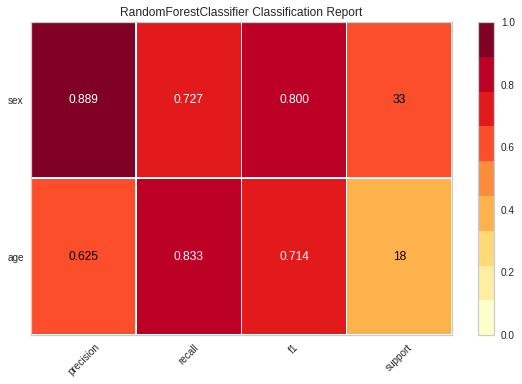

In [385]:
visualizer = ClassificationReport(classifier_rf, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()       

# MLP Classifier

In [386]:
classifier_nn = MLPClassifier(random_state=1, max_iter=1000, learning_rate='adaptive', hidden_layer_sizes=(500, )).fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier_nn.predict(X_test)


cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier_nn.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print("Comfusion Metrics Train :- \n",cm_train)
print("Comfusion Metrics Test :- \n",cm_test)
print('Accuracy for training set for MLP = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for MLP = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Comfusion Metrics Train :- 
 [[ 30   1]
 [ 68 103]]
Comfusion Metrics Test :- 
 [[ 5  1]
 [13 32]]
Accuracy for training set for MLP = 0.6584158415841584
Accuracy for test set for MLP = 0.7254901960784313


In [387]:
print("F1 Score train :- ",metrics.f1_score(y_pred_train, y_train))
print("ROC_AUC Score train :- ",metrics.roc_auc_score(y_pred_train, y_train))
print("Kappa Score train :- ",metrics.cohen_kappa_score(y_pred_train, y_train))
print()
print("F1 Score test :- ",metrics.f1_score(y_pred, y_test))
print("ROC_AUC Score test :- ",metrics.roc_auc_score(y_pred, y_test))
print("Kappa Score test :- ",metrics.cohen_kappa_score(y_pred, y_test))

F1 Score train :-  0.7490909090909091
ROC_AUC Score train :-  0.7850405583852104
Kappa Score train :-  0.30247222500250226

F1 Score test :-  0.8205128205128205
ROC_AUC Score test :-  0.7722222222222223
Kappa Score test :-  0.29166666666666674


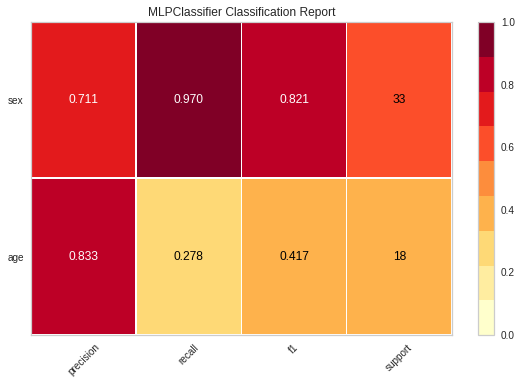

In [388]:
visualizer = ClassificationReport(classifier_nn, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()       

# Extra Tree Classifier

In [396]:


X_train, y_train = make_classification(n_features=13, random_state=0)
classifierf_et = ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=25, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.01, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                     oob_score=False, random_state=5881, verbose=0,
                     warm_start=False)

classifierf_et.fit(X_train, y_train)

y_pred = classifierf_et.predict(X_test)

cm_test = confusion_matrix(y_pred,y_test)
y_pred_train = classifierf_et.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print("Comfusion Metrics Train :- \n",cm_train)
print("Comfusion Metrics Test :- \n",cm_test)
print('Accuracy for training set for MLP = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for MLP = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Comfusion Metrics Train :- 
 [[48  4]
 [ 2 46]]
Comfusion Metrics Test :- 
 [[ 0  0]
 [18 33]]
Accuracy for training set for MLP = 0.94
Accuracy for test set for MLP = 0.6470588235294118


In [397]:


print("F1 Score train :- ",metrics.f1_score(y_pred_train, y_train))
print("ROC_AUC Score train :- ",metrics.roc_auc_score(y_pred_train, y_train))
print("Kappa Score train :- ",metrics.cohen_kappa_score(y_pred_train, y_train))
print()
print("F1 Score test :- ",metrics.f1_score(y_pred, y_test))
print("ROC_AUC Score test :- ",metrics.roc_auc_score(y_pred, y_test))
print("Kappa Score test :- ",metrics.cohen_kappa_score(y_pred, y_test))

F1 Score train :-  0.9387755102040817
ROC_AUC Score train :-  0.9407051282051283
Kappa Score train :-  0.88

F1 Score test :-  0.7857142857142858


ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

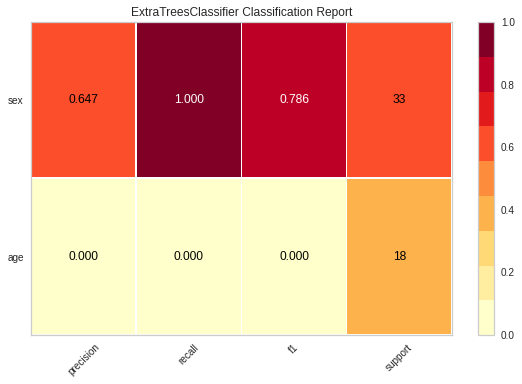

In [391]:
visualizer = ClassificationReport(classifierf_et, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()       

# Using Pycaret

In [411]:
data = pd.read_csv("/kaggle/input/MLChallenge-2/final.csv")
data_sub = pd.read_csv("/kaggle/input/MLChallenge-2/Test.csv")

data=data.drop(['ID'], axis = 1) 
# df=df.drop(['ID'], axis = 1)

In [430]:
# Checking input and Comparing models for best performance
exp1= setup(data, 
            target = 'target', 
            train_size = 0.7, 
            sampling = True, 
            high_cardinality_method = 'frequency', 
            normalize_method = 'zscore',
            transformation = False,
            unknown_categorical_method = 'least_frequent',
            ignore_low_variance = False,
            bin_numeric_features = None, 
            remove_outliers = False, 
            outliers_threshold = 0.04, 
            remove_multicollinearity = False,
            fix_imbalance = False, 
            fix_imbalance_method = None,
            data_split_shuffle = True, 
            folds_shuffle = False, 
            n_jobs = -1,
            verbose=True
           )


Setup Succesfully Completed!


,Description,Value
0,session_id,1035
1,Target Type,Binary
2,Label Encoded,"0: 0, 1: 1"
3,Original Data,"(253, 14)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [431]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.8922,0.9502,0.9144,0.8927,0.9015,0.7819,0.7864,0.0361
1,Logistic Regression,0.8810,0.9480,0.9156,0.8804,0.8906,0.7593,0.7740,0.0329
2,Gradient Boosting Classifier,0.8755,0.9382,0.9267,0.8660,0.8908,0.7477,0.7611,0.0953
3,CatBoost Classifier,0.8755,0.9551,0.9267,0.8678,0.8897,0.7470,0.7650,1.2986
4,Extra Trees Classifier,0.8712,0.9439,0.8978,0.8853,0.8857,0.7384,0.7530,0.2719
5,Decision Tree Classifier,0.8703,0.8722,0.8778,0.8930,0.8802,0.7399,0.7498,0.0045
6,Linear Discriminant Analysis,0.8585,0.9396,0.8944,0.8669,0.8717,0.7130,0.7312,0.0058
7,Ridge Classifier,0.8529,0.0000,0.8956,0.8571,0.8675,0.7017,0.7203,0.0058
8,Light Gradient Boosting Machine,0.8523,0.9471,0.8944,0.8502,0.8677,0.7004,0.7103,0.0167
9,Ada Boost Classifier,0.8474,0.9400,0.8733,0.8579,0.8597,0.6922,0.7040,0.1685


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=1035, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [432]:

# We can see that XGB is giving best scores 

In [433]:
xgboost = create_model('xgboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8889,0.9875,1.0000,0.8333,0.9091,0.7692,0.7906
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8889,0.9625,0.9000,0.9000,0.9000,0.7750,0.7750
3,0.8333,0.9125,0.9000,0.8182,0.8571,0.6582,0.6625
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.8889,0.9500,0.9000,0.9000,0.9000,0.7750,0.7750
6,0.8333,0.8148,0.8889,0.8000,0.8421,0.6667,0.6708
7,0.8235,0.9444,0.8889,0.8000,0.8421,0.6434,0.6480
8,0.8235,0.9444,0.7778,0.8750,0.8235,0.6483,0.6528
9,0.9412,0.9861,0.8889,1.0000,0.9412,0.8828,0.8889


In [434]:
tune_xgb = tune_model(xgboost)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,0.9750,1.0000,0.7692,0.8696,0.6494,0.6934
1,0.9444,1.0000,0.9000,1.0000,0.9474,0.8889,0.8944
2,0.8889,0.9500,0.9000,0.9000,0.9000,0.7750,0.7750
3,0.8889,0.9375,0.9000,0.9000,0.9000,0.7750,0.7750
4,0.9444,0.9875,1.0000,0.9091,0.9524,0.8861,0.8919
5,0.8889,0.9250,0.9000,0.9000,0.9000,0.7750,0.7750
6,0.7222,0.8395,0.8889,0.6667,0.7619,0.4444,0.4714
7,0.8824,0.9167,1.0000,0.8182,0.9000,0.7606,0.7833
8,0.8235,0.9444,0.7778,0.8750,0.8235,0.6483,0.6528
9,0.9412,0.9861,0.8889,1.0000,0.9412,0.8828,0.8889


In [435]:
xgb_bagged = ensemble_model(xgboost,method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.9500,0.9000,0.7500,0.8182,0.5385,0.5534
1,0.9444,1.0000,1.0000,0.9091,0.9524,0.8861,0.8919
2,0.9444,0.9625,1.0000,0.9091,0.9524,0.8861,0.8919
3,0.7778,0.9000,0.8000,0.8000,0.8000,0.5500,0.5500
4,0.8889,0.9750,0.9000,0.9000,0.9000,0.7750,0.7750
5,0.8333,0.9125,0.8000,0.8889,0.8421,0.6667,0.6708
6,0.7222,0.8519,0.8889,0.6667,0.7619,0.4444,0.4714
7,0.8235,0.9306,0.8889,0.8000,0.8421,0.6434,0.6480
8,0.8235,0.9583,0.7778,0.8750,0.8235,0.6483,0.6528
9,0.8824,0.9583,0.7778,1.0000,0.8750,0.7671,0.7888


In [443]:
evaluate_model(xgboost) # Multiple charts :- Click on blocks to see graphs

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [444]:
# Second Best id Logistic regression

In [445]:
lr = create_model('lr')



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,0.9500,1.0000,0.7692,0.8696,0.6494,0.6934
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8889,0.9625,0.9000,0.9000,0.9000,0.7750,0.7750
3,0.8333,0.9625,0.8000,0.8889,0.8421,0.6667,0.6708
4,0.9444,0.9625,1.0000,0.9091,0.9524,0.8861,0.8919
5,0.8889,0.9500,0.9000,0.9000,0.9000,0.7750,0.7750
6,0.8333,0.9012,0.8889,0.8000,0.8421,0.6667,0.6708
7,0.8824,0.9444,1.0000,0.8182,0.9000,0.7606,0.7833
8,0.8824,0.9167,1.0000,0.8182,0.9000,0.7606,0.7833
9,0.8235,0.9306,0.6667,1.0000,0.8000,0.6531,0.6963


In [446]:
lr


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1035, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [447]:
tune_lr = tune_model(lr)



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7222,0.9500,0.9000,0.6923,0.7826,0.4156,0.4438
1,0.9444,1.0000,0.9000,1.0000,0.9474,0.8889,0.8944
2,0.8889,0.9375,0.9000,0.9000,0.9000,0.7750,0.7750
3,0.8333,0.9625,0.8000,0.8889,0.8421,0.6667,0.6708
4,0.8889,0.9625,0.9000,0.9000,0.9000,0.7750,0.7750
5,0.8889,0.9500,0.9000,0.9000,0.9000,0.7750,0.7750
6,0.7778,0.8889,0.7778,0.7778,0.7778,0.5556,0.5556
7,0.9412,0.9306,1.0000,0.9000,0.9474,0.8811,0.8874
8,0.8824,0.9167,1.0000,0.8182,0.9000,0.7606,0.7833
9,0.8235,0.9306,0.6667,1.0000,0.8000,0.6531,0.6963


In [448]:
lr_bagged = ensemble_model(lr,method = 'Bagging')



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.9375,0.9000,0.7500,0.8182,0.5385,0.5534
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8889,0.9750,0.9000,0.9000,0.9000,0.7750,0.7750
3,0.8333,0.9500,0.8000,0.8889,0.8421,0.6667,0.6708
4,0.9444,0.9500,1.0000,0.9091,0.9524,0.8861,0.8919
5,0.8889,0.9500,0.9000,0.9000,0.9000,0.7750,0.7750
6,0.8889,0.9383,1.0000,0.8182,0.9000,0.7778,0.7977
7,0.8824,0.9583,1.0000,0.8182,0.9000,0.7606,0.7833
8,0.8824,0.9306,1.0000,0.8182,0.9000,0.7606,0.7833
9,0.8235,0.9167,0.6667,1.0000,0.8000,0.6531,0.6963


In [449]:
lr_boosted = ensemble_model(lr,method = 'Boosting')



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7222,0.8875,0.9000,0.6923,0.7826,0.4156,0.4438
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.7778,0.9500,0.8000,0.8000,0.8000,0.5500,0.5500
3,0.8333,0.9625,0.8000,0.8889,0.8421,0.6667,0.6708
4,0.8889,0.9500,1.0000,0.8333,0.9091,0.7692,0.7906
5,0.8889,0.9500,0.9000,0.9000,0.9000,0.7750,0.7750
6,0.8889,0.9136,1.0000,0.8182,0.9000,0.7778,0.7977
7,0.8235,0.9861,1.0000,0.7500,0.8571,0.6383,0.6847
8,0.8235,0.9444,0.8889,0.8000,0.8421,0.6434,0.6480
9,0.8235,0.9444,0.6667,1.0000,0.8000,0.6531,0.6963


In [450]:
evaluate_model(lr) # Multiple charts

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
# Third best Gradient Boosting

In [451]:
gbc = create_model('gbc')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,0.9625,1.0000,0.7692,0.8696,0.6494,0.6934
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8889,0.9250,0.9000,0.9000,0.9000,0.7750,0.7750
3,0.8889,0.9250,0.9000,0.9000,0.9000,0.7750,0.7750
4,0.9444,0.9750,1.0000,0.9091,0.9524,0.8861,0.8919
5,0.8333,0.9125,0.8000,0.8889,0.8421,0.6667,0.6708
6,0.7778,0.8765,1.0000,0.6923,0.8182,0.5556,0.6202
7,0.8235,0.8611,0.8889,0.8000,0.8421,0.6434,0.6480
8,0.8235,0.9583,0.8889,0.8000,0.8421,0.6434,0.6480
9,0.9412,0.9861,0.8889,1.0000,0.9412,0.8828,0.8889


In [452]:
gbc


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1035, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [453]:
tune_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,1.0000,1.0000,0.7143,0.8333,0.5263,0.5976
1,0.8889,0.9875,0.8000,1.0000,0.8889,0.7805,0.8000
2,0.8889,0.9500,0.9000,0.9000,0.9000,0.7750,0.7750
3,0.8889,0.9000,0.9000,0.9000,0.9000,0.7750,0.7750
4,0.8333,0.9750,0.8000,0.8889,0.8421,0.6667,0.6708
5,0.8889,0.9500,0.9000,0.9000,0.9000,0.7750,0.7750
6,0.7778,0.8642,1.0000,0.6923,0.8182,0.5556,0.6202
7,0.8824,0.9583,1.0000,0.8182,0.9000,0.7606,0.7833
8,0.8824,0.9722,0.7778,1.0000,0.8750,0.7671,0.7888
9,0.8235,0.9306,0.6667,1.0000,0.8000,0.6531,0.6963


In [454]:
mlp = create_model('mlp')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.9250,1.0000,0.7143,0.8333,0.5263,0.5976
1,0.8889,1.0000,0.8000,1.0000,0.8889,0.7805,0.8000
2,0.8333,0.9000,0.8000,0.8889,0.8421,0.6667,0.6708
3,0.8889,0.9250,0.8000,1.0000,0.8889,0.7805,0.8000
4,0.8333,0.9500,0.9000,0.8182,0.8571,0.6582,0.6625
5,0.8333,0.9250,0.9000,0.8182,0.8571,0.6582,0.6625
6,0.8333,0.9259,0.8889,0.8000,0.8421,0.6667,0.6708
7,0.8235,0.9028,1.0000,0.7500,0.8571,0.6383,0.6847
8,0.8824,0.9306,0.8889,0.8889,0.8889,0.7639,0.7639
9,0.6471,0.8056,0.4444,0.8000,0.5714,0.3108,0.3499


In [457]:
# Model Stacking
# train indvidual models for stacking
xgb = create_model('xgboost')
lr_bagged = ensemble_model(lr,method = 'Bagging')
lr = create_model('lr')
gbc = create_model('gbc')
rf = create_model('catboost')
et = create_model('et')
dt = create_model('dt')


# stack trained models
stacked_models = stack_models(estimator_list=[xgb,lr_bagged,lr,gbc,rf,et,dt])



,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8889,0.9750,1.0000,0.8333,0.9091,0.7692,0.7906
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8889,0.9375,0.9000,0.9000,0.9000,0.7750,0.7750
3,0.8889,0.9375,0.9000,0.9000,0.9000,0.7750,0.7750
4,0.9444,0.9750,1.0000,0.9091,0.9524,0.8861,0.8919
5,0.8889,0.9250,0.9000,0.9000,0.9000,0.7750,0.7750
6,0.8889,0.9383,1.0000,0.8182,0.9000,0.7778,0.7977
7,0.8824,0.9444,1.0000,0.8182,0.9000,0.7606,0.7833
8,0.8235,0.9444,0.8889,0.8000,0.8421,0.6434,0.6480
9,0.8235,0.9306,0.6667,1.0000,0.8000,0.6531,0.6963


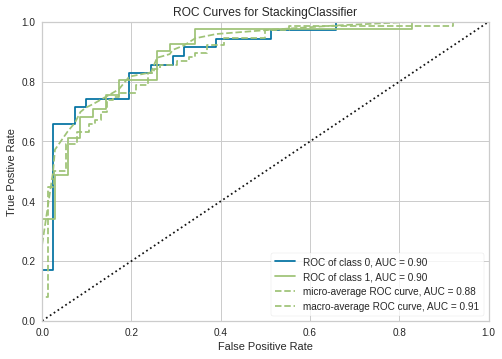

In [458]:
plot_model(stacked_models, plot = 'auc')

In [461]:
evaluate_model(stacked_models)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [462]:
# Blender Model
blender = blend_models(estimator_list=[xgb,lr_bagged,lr,gbc,rf,et,dt])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8333,0.0000,1.0000,0.7692,0.8696,0.6494,0.6934
1,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8889,0.0000,0.9000,0.9000,0.9000,0.7750,0.7750
3,0.8333,0.0000,0.8000,0.8889,0.8421,0.6667,0.6708
4,0.9444,0.0000,1.0000,0.9091,0.9524,0.8861,0.8919
5,0.8333,0.0000,0.8000,0.8889,0.8421,0.6667,0.6708
6,0.8333,0.0000,1.0000,0.7500,0.8571,0.6667,0.7071
7,0.8824,0.0000,1.0000,0.8182,0.9000,0.7606,0.7833
8,0.8235,0.0000,0.8889,0.8000,0.8421,0.6434,0.6480
9,0.8824,0.0000,0.7778,1.0000,0.8750,0.7671,0.7888


In [464]:
evaluate_model(blender)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [465]:
xgboost = create_model('xgboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8889,0.9875,1.0000,0.8333,0.9091,0.7692,0.7906
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8889,0.9625,0.9000,0.9000,0.9000,0.7750,0.7750
3,0.8333,0.9125,0.9000,0.8182,0.8571,0.6582,0.6625
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.8889,0.9500,0.9000,0.9000,0.9000,0.7750,0.7750
6,0.8333,0.8148,0.8889,0.8000,0.8421,0.6667,0.6708
7,0.8235,0.9444,0.8889,0.8000,0.8421,0.6434,0.6480
8,0.8235,0.9444,0.7778,0.8750,0.8235,0.6483,0.6528
9,0.9412,0.9861,0.8889,1.0000,0.9412,0.8828,0.8889


In [466]:
# # From above results We can see that XGBoost is giving the best performance
#
#         Accuracy   AUC     Recall    Prec.     F1      Kappa     MCC
#
#
# Mean    0.8922    0.9502   0.9144   0.8927   0.9015   0.7819   0.7864
#
# SD      0.0648    0.0525   0.0657   0.0782   0.0601   0.1308   0.1295
